# Residual Networks

In [1]:
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

import keras.backend as K
K.set_image_data_format('channels_last')

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load the saved model
model = load_model('models/ResNet18.h5')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   3200        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 64)   0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [ ]:
# we still use adam optimizer

# sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [3]:
# load dataset
img_width, img_height = 64, 64
train_data_dir = "images/train_gray64"
validation_data_dir = "images/dev_gray64"
nb_train_samples = 30580
nb_validation_samples = 7631
batch_size = 32
epochs = 100

In [4]:
# initiate the train and validation generators with data augumentation
train_datagen = image.ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rescale=1./255,
        fill_mode='nearest')

valid_datagen = image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode='categorical')

# save the model according to the conditions
checkpoint = ModelCheckpoint("models/main_ResNet18.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

Found 30580 images belonging to 18 classes.
Found 7631 images belonging to 18 classes.


In [5]:
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'BabyBibs': 0, 'BabyHat': 1, 'BabyPants': 2, 'BabyShirt': 3, 'PackageFart': 4, 'womanshirtsleeve': 5, 'womencasualshoes': 6, 'womenchiffontop': 7, 'womendollshoes': 8, 'womenknittedtop': 9, 'womenlazyshoes': 10, 'womenlongsleevetop': 11, 'womenpeashoes': 12, 'womenplussizedtop': 13, 'womenpointedflatshoes': 14, 'womensleevelesstop': 15, 'womenstripedtop': 16, 'wrapsnslings': 17}
{'BabyBibs': 0, 'BabyHat': 1, 'BabyPants': 2, 'BabyShirt': 3, 'PackageFart': 4, 'womanshirtsleeve': 5, 'womencasualshoes': 6, 'womenchiffontop': 7, 'womendollshoes': 8, 'womenknittedtop': 9, 'womenlazyshoes': 10, 'womenlongsleevetop': 11, 'womenpeashoes': 12, 'womenplussizedtop': 13, 'womenpointedflatshoes': 14, 'womensleevelesstop': 15, 'womenstripedtop': 16, 'wrapsnslings': 17}


In [6]:
H = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size,
    callbacks = [checkpoint, early])

Epoch 1/100
955/955 [==============================] - 774s 811ms/step - loss: 1.2894 - acc: 0.5523 - val_loss: 1.2308 - val_acc: 0.5748

Epoch 00001: val_acc improved from -inf to 0.57484, saving model to models/main_ResNet18.h5
Epoch 2/100
955/955 [==============================] - 769s 805ms/step - loss: 1.2378 - acc: 0.5664 - val_loss: 1.4080 - val_acc: 0.5439

Epoch 00002: val_acc did not improve
Epoch 3/100
955/955 [==============================] - 767s 804ms/step - loss: 1.2021 - acc: 0.5806 - val_loss: 1.2474 - val_acc: 0.5697

Epoch 00003: val_acc did not improve
Epoch 4/100
955/955 [==============================] - 769s 805ms/step - loss: 1.1740 - acc: 0.5888 - val_loss: 1.2261 - val_acc: 0.5827

Epoch 00004: val_acc improved from 0.57484 to 0.58271, saving model to models/main_ResNet18.h5
Epoch 5/100
955/955 [==============================] - 770s 807ms/step - loss: 1.1438 - acc: 0.6019 - val_loss: 1.1880 - val_acc: 0.5856

Epoch 00005: val_acc improved from 0.58271 to 0.5

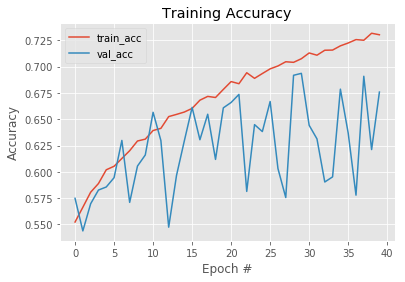

In [9]:
import numpy as np
plt.style.use("ggplot")
plt.figure()
N = 40
# plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")
plt.savefig('main_ResNet18.png')
plt.show()

## Further test

In [10]:
model = load_model('models/main_ResNet18.h5')

eval_datagen = image.ImageDataGenerator(rescale=1./255)

eval_generator = eval_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode='categorical')

Found 7631 images belonging to 18 classes.


In [11]:
preds = model.evaluate_generator(
    eval_generator,
    steps = nb_validation_samples // batch_size)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

Loss = 0.9230877134729835
Test Accuracy = 0.692358193277311


In [ ]:
# plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))